#Part 4: Fine-tune a LLM for your Poet  Links to an external site.

 Use this notebookLinks to an external site. as a template and modify as you need to.
Rubric:
Purpose of this segment of the NLP course is to fine tune a model that represents yuor poet.

1. Pick one poet
2. Scrape 30-40 poems from this poet
3. convert the poems into one <poet>_<poem_name>.jsonl
4. Use this notebook to fine tune a mistral 7b model with the 30-40 poems of that poet
5. save the model as <poet>_mistral7b.mod
6. query the model for new poetry
7. your model will generate new poetry in the style of the original poet
8. save the output for 5 poems you generate
9. try [poem] and try [line] determine which one of these chunking options will generate more coherent language

Note: save the output from each prompt so we can evaluate the coherence of the generated language

10. assess the cosine similarity between the generated poems of this poem -- whatever this lang model produces and the previous poems you scraped from this poet.
11. Human assessment of the resulting outcomes

##Team - PlaceHolder
1. Chinmayi Sunku
2. Ujwala Mote
3. Suma Nagral
4. Nihal

In [ ]:
import pickle

try:
  with open('notebook_state_LLM_1.pkl', 'rb') as f:
    notebook_state = pickle.load(f)
except FileNotFoundError:
  notebook_state = {'has_run': False}

if notebook_state.get('has_run', False):
  pass
else:
  !pip install -q -U bitsandbytes
  !pip install -q -U git+https://github.com/huggingface/transformers.git
  !pip install -q -U git+https://github.com/huggingface/peft.git
  !pip install -q -U git+https://github.com/huggingface/accelerate.git
  !pip install -q trl xformers wandb datasets einops sentencepiece

  !pip3 install nltk
  !pip3 install sentence-transformers
  !pip3 install contractions
  !pip3 install pandas
  !pip install bertopic
  !pip install gensim
  !pip install pyLDAvis
  !pip install spacy
  !pip install requests
  !pip install beautifulsoup4
  !pip install lxml
  !pip install fastapi kaleido python-multipart uvicorn
  !pip install numpy==1.23.3 pandas==1.5.3
  !pip install datasets
  notebook_state['has_run'] = True

with open('notebook_state_LLM_1.pkl', 'wb') as f:
  pickle.dump(notebook_state, f)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 10.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import requests
import pandas as pd
import bs4 as bs
import urllib.request
import json
import contractions
import re
import nltk
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
from nltk.corpus import stopwords
from transformers import pipeline
from spacy import displacy
from bertopic import BERTopic
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import pyLDAvis
import gensim
import spacy
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
from gensim.utils import simple_preprocess

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)


In [ ]:
import warnings
warnings.filterwarnings('ignore', 'Calling')
warnings.filterwarnings('ignore', 'For a faster implementation')
warnings.filterwarnings('ignore', 'In')
warnings.filterwarnings('ignore', 'SelectableGroups dict interface')
warnings.filterwarnings('ignore', '`np')
warnings.filterwarnings('ignore', 'SelectableGroups')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')
nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# 1. Pick one poet

In [ ]:
poet = "William Blake"
store_loc = "/content/drive/MyDrive/HW10/LLM/"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 2. Scrape 30-40 poems from this poet

In [ ]:
def clean_txt(text):
    text=text.replace(u'\xa0', u' ').replace(r'\r',u'\n').replace(r'\n', ' ').replace('\n', ' ').replace('\t', ' ')
    text = contractions.fix(text)
    text = text.strip().lower()
    text = re.sub(r"'", ' ', text)
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((i, " ") for i in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    text = ' '.join([w for w in text.split() if len(w)>1])
    text = re.sub(' +', ' ', text)
    text = ''.join(text)
    return text

def scrapePoemFromURL(poem_url_list):
    poems_results=[]
    for url in poem_url_list:
        header = {'User-Agent':'Mozilla/5.0'}
        requests = urllib.request.Request(url,headers=header)
        requestread = urllib.request.urlopen(requests).read()
        soup = bs.BeautifulSoup(requestread,'html.parser')
        poem_for_human = soup.find_all('div', class_="poem_body")[0].text.replace("© by owner. provided at no charge for educational purposes", "")
        poem_for_machine = (clean_txt(poem_for_human))
        poem_title = soup.find_all('h1')[0].text
        poems_results.append([poem_title, poem_for_machine])
    return poems_results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def get_poem_url_json(poet):
    site = "https://allpoetry.com"
    search = "https://allpoetry.com/items/read_by/"
    page = 1
    URL_list = list()
    while len(URL_list) < 30:
        url = search + poet + "?page=" + str(page)
        response = requests.get(url)
        soup = bs.BeautifulSoup(response.text, 'lxml')
        poem_list = soup.find_all('a', href=True, class_='nocolor fn')
        for i in range(len(poem_list)):
            #print(poem_list[i]['href'])
            URL_list.append(site + poem_list[i]['href'])
            if len(URL_list) == 30:
                break
        page += 1
    return {"poet":poet, "URL":URL_list}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pd_title_list = ["Title", "Poem"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def getPoem(file_name, URLs):
    df = pd.DataFrame()
    if os.path.exists(file_name):
        df = pd.read_csv(file_name)
    else:
        os.makedirs(os.path.dirname(file_name), exist_ok=True)
        df = pd.DataFrame(scrapePoemFromURL(URLs), columns=pd_title_list)
        df.to_csv(file_name)
        temp_name = file_name
        file_name_json = temp_name.replace(".csv",".json")
        df.to_json(file_name_json)
    return df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
file_name = store_loc + poet.replace(" ", "_") + ".csv"
data= getPoem(file_name, get_poem_url_json(poet)['URL'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Title,Poem
0,0,The Sick Rose,rose thou art sick the invisible worm that fli...
1,1,Love's Secret,never seek to tell thy love love that never to...
2,2,A Poison Tree,was angry with my friend told my wrath my wrat...
3,3,The Lamb,little lamb who made thee dost thou know who m...
4,4,The Tyger,tyger tyger burning bright in the forest of th...
5,5,London,wandered through each chartered street near wh...
6,6,A Divine Image,cruelty has human heart and jealousy human fac...
7,7,A Little Boy Lost,nought loves another as itself nor venerates a...
8,8,Ah! Sunflower,ah sunflower weary of time who countest the st...
9,9,The Schoolboy,love to rise in summer morn when the birds sin...


# 3. convert the poems into one William_Blake.jsonl

In [ ]:
import pandas as pd
import json
import random

# Function to save data as a JSONL file
def save_as_jsonl(data, output_filename):
    """Save the provided data as a .jsonl file."""
    with open(output_filename, 'w') as file:
        for entry in data:
            file.write(json.dumps(entry) + '\n')

data_list = data.to_dict(orient='records')
random.shuffle(data_list)
split_index = int(0.8 * len(data_list))
train_data, val_data = data_list[:split_index], data_list[split_index:]

# Save as .jsonl
save_as_jsonl(train_data, store_loc+'William_Blake_train.jsonl')
save_as_jsonl(val_data, store_loc+'William_Blake_val.jsonl')

print("Data saved to 'train.jsonl' and 'val.jsonl'")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Data saved to 'train.jsonl' and 'val.jsonl'


# Data Preprocessing

In [ ]:
from datasets import load_dataset

train_dataset = load_dataset('json', data_files=store_loc+'William_Blake_train.jsonl', split='train')
eval_dataset = load_dataset('json', data_files=store_loc+'William_Blake_train.jsonl', split='train')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
train_dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset({
    features: ['Unnamed: 0', 'Title', 'Poem'],
    num_rows: 24
})

In [ ]:
def formatting_func(example, chunk_type='poem'):
    poet_name = "William Blake"
    text = ""

    if chunk_type == 'poem':
        # Formatting for the entire poem
        text = f"### The following is a poem by the poet {poet_name}:\n{example['Poem']}"
    elif chunk_type == 'line':
        # Formatting for each line of the poem
        lines = example['Poem'].split('\n')  # Assuming each line of the poem is separated by a newline character
        text = f"### The following are lines by the poet {poet_name}:\n"
        text += '\n'.join([f"- {line}" for line in lines if line.strip() != ''])
    else:
        raise ValueError("chunk_type must be either 'poem' or 'line'.")

    return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#**Load the base model**

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, pipeline
import torch
import transformers
base_model_id = "bn22/Mistral-7B-Instruct-v0.1-sharded"


bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained(
    base_model_id,
    quantization_config=bnb_config
)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Loading checkpoint shards:   0%|          | 0/11 [00:00<?, ?it/s]

#Tokenization

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    padding_side="left",
    add_eos_token=True,
    add_bos_token=True,
)
tokenizer.pad_token = tokenizer.eos_token

def generate_and_tokenize_prompt(prompt):
    return tokenizer(formatting_func(prompt))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tokenized_train_dataset = train_dataset.map(generate_and_tokenize_prompt)
tokenized_val_dataset = eval_dataset.map(generate_and_tokenize_prompt)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Map:   0%|          | 0/24 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


48


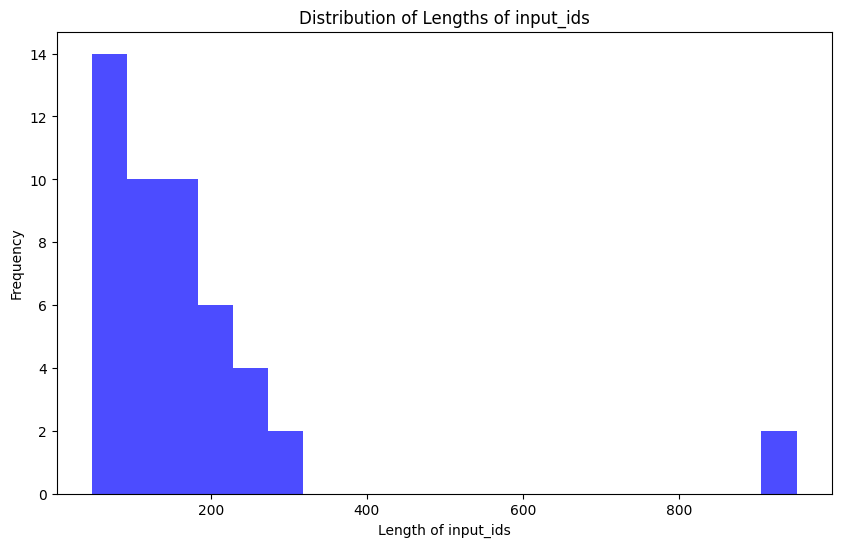

In [ ]:
import matplotlib.pyplot as plt

def plot_data_lengths(tokenize_train_dataset, tokenized_val_dataset):
    lengths = [len(x['input_ids']) for x in tokenized_train_dataset]
    lengths += [len(x['input_ids']) for x in tokenized_val_dataset]
    print(len(lengths))

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=20, alpha=0.7, color='blue')
    plt.xlabel('Length of input_ids')
    plt.ylabel('Frequency')
    plt.title('Distribution of Lengths of input_ids')
    plt.show()

plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset)

In [ ]:
max_length = 636

def generate_and_tokenize_prompt(prompt):
    print("prompt send to tokenize: ", prompt)
    result = tokenizer(
        formatting_func(prompt),
        truncation=True,
        max_length=max_length,
        padding="max_length",
    )
    result["labels"] = result["input_ids"].copy()
    return result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tokenized_train_dataset = train_dataset.map(generate_and_tokenize_prompt)
tokenized_val_dataset = eval_dataset.map(generate_and_tokenize_prompt)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Map:   0%|          | 0/24 [00:00<?, ? examples/s]

prompt send to tokenize:  {'Unnamed: 0': 26, 'Title': 'Nurses Song (Experience)', 'Poem': 'when the voices of children are heard on the green and whisprings are in the dale the days of my youth rise fresh in my mind my face turns green and pale then come home my children the sun is gone down and the dews of night arise your spring your day are wasted in play and your winter and night in disguise'}
prompt send to tokenize:  {'Unnamed: 0': 27, 'Title': 'The Angel', 'Poem': 'dreamt dream what can it mean and that was maiden queen guarded by an angel mild witless woe was never beguiled and wept both night and day and he wiped my tears away and wept both day and night and hid from him my heart delight so he took his wings and fled then the morn blushed rosy red dried my tears and armed my fears with ten thousand shields and spears soon my angel came again was armed he came in vain for the time of youth was fled and grey hairs were on my head'}
prompt send to tokenize:  {'Unnamed: 0': 5, 'Ti

Map:   0%|          | 0/24 [00:00<?, ? examples/s]

prompt send to tokenize:  {'Unnamed: 0': 26, 'Title': 'Nurses Song (Experience)', 'Poem': 'when the voices of children are heard on the green and whisprings are in the dale the days of my youth rise fresh in my mind my face turns green and pale then come home my children the sun is gone down and the dews of night arise your spring your day are wasted in play and your winter and night in disguise'}
prompt send to tokenize:  {'Unnamed: 0': 27, 'Title': 'The Angel', 'Poem': 'dreamt dream what can it mean and that was maiden queen guarded by an angel mild witless woe was never beguiled and wept both night and day and he wiped my tears away and wept both day and night and hid from him my heart delight so he took his wings and fled then the morn blushed rosy red dried my tears and armed my fears with ten thousand shields and spears soon my angel came again was armed he came in vain for the time of youth was fled and grey hairs were on my head'}
prompt send to tokenize:  {'Unnamed: 0': 5, 'Ti

In [ ]:
print(tokenized_train_dataset[1]['input_ids'])

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


48


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


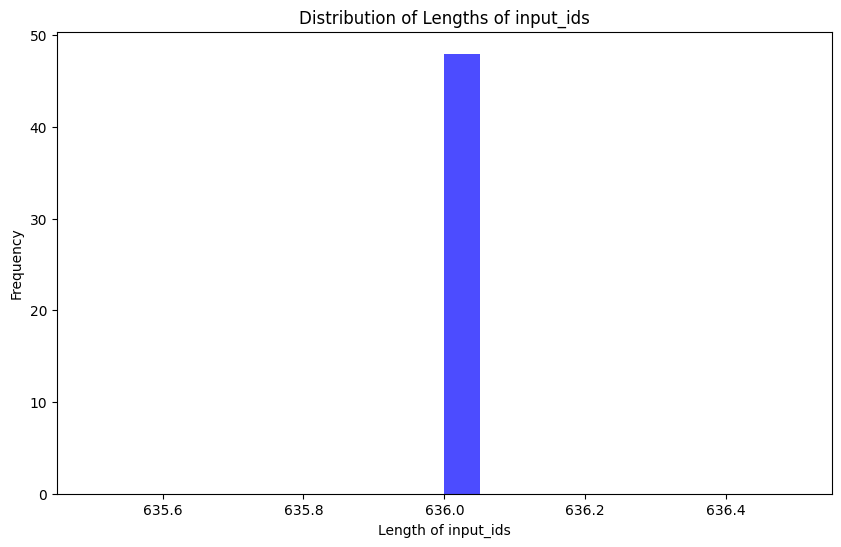

In [ ]:
plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset)

# How does the base model do?



In [ ]:
eval_prompt = " The following is a Poem by William Blake the Poet: # "

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Re-init the tokenizer so it doesn't add padding or eos token
tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    add_bos_token=True,
)

model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")

model.eval()
with torch.no_grad():
    print(tokenizer.decode(model.generate(**model_input, max_new_tokens=256, repetition_penalty=1.15)[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


 The following is a Poem by William Blake the Poet: # 13

And did those feet in ancient time
Walk upon the mountains and the hills?
Did they hear God's voice thunder,
Through the tempests and the stills?

And did those feet in ancient time
Raise up their heads to heaven's gate?
Did they see the stars that shine
At eternal night's close gate?

When all at once I saw afar
Our Savior Jesus Christ,
My heart with joy filled up;
I sprang from my bed.
The sun rose—how bright!
It burned upon my brow
In its full splendor.

What a wondrous world we inhabit,
Now that God has revealed himself
Unto his creatures on earth!


#Set up LORA

In [ ]:
from peft import prepare_model_for_kbit_training

model.gradient_checkpointing_enable()
model = prepare_model_for_kbit_training(model)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(model)

MistralForCausalLM(
  (model): MistralModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): MistralRotaryEmbedding()
        )
        (mlp): MistralMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MistralRMSNorm()
        (post_attention_layernorm): MistralRMSNorm()
      )
    )
   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
        "lm_head",
    ],
    bias="none",
    lora_dropout=0.05,  # Conventional
    task_type="CAUSAL_LM",
)

model = get_peft_model(model, config)
print_trainable_parameters(model)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


trainable params: 85041152 || all params: 3837112320 || trainable%: 2.2162799758751914


In [ ]:
print(model)

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): MistralForCausalLM(
      (model): MistralModel(
        (embed_tokens): Embedding(32000, 4096)
        (layers): ModuleList(
          (0-31): 32 x MistralDecoderLayer(
            (self_attn): MistralAttention(
              (q_proj): Linear4bit(
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=4096, out_features=32, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=32, out_features=4096, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
                (base_layer): Linear4bit(in_features=4096, out_features=4096, bias=False)
              )
              (k_proj): Linear4bit(
                (lora_dropout): ModuleDict(

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Model training

In [ ]:
if torch.cuda.device_count() > 1: # If more than 1 GPU
    model.is_parallelizable = True
    model.model_parallel = True

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
torch.cuda.device_count()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1

In [ ]:
import wandb
wandb.login(key = "356ad7ffbc2e552e3f718bbeb7b90789e31d92fc")
# run = wandb.init(project='Placeholders - Fine tuning mistral 7B', job_type="training", anonymous="allow")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/notebook/utils.py:280: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  return LooseVersion(v) >= LooseVersion(check)
/usr/local/lib/python3.10/dist-packages/notebook/utils.py:280: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  return LooseVersion(v) >= LooseVersion(check)
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environme

True

In [ ]:
new_model_path="/content/drive/MyDrive/HW10/LLM/MistralAI7BV1"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Fine-tune model with poem chuncking

In [ ]:
import transformers
from datetime import datetime

if not os.path.exists(new_model_path + "William_Blake_mistral7b.mod"):
    project = "journal-finetune"
    base_model_name = "mistral"
    run_name = base_model_name + "-" + project
    output_dir = "./" + run_name

    trainer = transformers.Trainer(
        model=model,
        train_dataset=tokenized_train_dataset,
        eval_dataset=tokenized_val_dataset,
        args=transformers.TrainingArguments(
            output_dir=output_dir,
            warmup_steps=1,
            per_device_train_batch_size=2,
            gradient_accumulation_steps=1,
            max_steps=175, #500
            learning_rate=2.5e-5, # Want a small lr for finetuning
            #bf16=False,
            #tf32=True,
            optim="paged_adamw_8bit",
            logging_steps=25,              # When to start reporting loss
            logging_dir="./logs",        # Directory for storing logs
            save_strategy="steps",       # Save the model checkpoint every logging step
            save_steps=25,                # Save checkpoints every 50 steps
            evaluation_strategy="steps", # Evaluate the model every logging step
            eval_steps=25,               # Evaluate and save checkpoints every 50 steps
            do_eval=True,                # Perform evaluation at the end of training
            #report_to="wandb",           # Comment this out if you don't want to use weights & baises
            #run_name=f"{run_name}-{datetime.now().strftime('%Y-%m-%d-%H-%M')}"          # Name of the W&B run (optional)
        ),
        data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False),
    )

    model.config.use_cache = False  # silence the warnings. Please re-enable for inference!
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    trainer.train()

    model.save_pretrained(new_model_path + "William_Blake_mistral7b.mod")
    tokenizer.save_pretrained(new_model_path)
    wandb.finish()
    model.config.use_cache = True
    model.eval()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Load and Query the Pre-Trained Mistral7BV1 Model

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install transformers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from huggingface_hub import notebook_login
!huggingface-cli login

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
import torch, transformers
from transformers import AutoModelForCausalLM, AutoTokenizer

bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)
trained_model = AutoModelForCausalLM.from_pretrained(new_model_path + "William_Blake_mistral7b.mod", quantization_config=bnb_config)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Loading checkpoint shards:   0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
trained_tokenizer = AutoTokenizer.from_pretrained(
    new_model_path + "William_Blake_mistral7b.mod",
    padding_side="left",
    add_eos_token=True,
    add_bos_token=True,
)
trained_tokenizer.pad_token = trained_tokenizer.eos_token

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Function to generate poetry
def generate_poetry(prompt, max_length=50):
    input_ids = trained_tokenizer.encode(prompt, return_tensors='pt')
    output = trained_model.generate(input_ids, max_length=max_length, num_return_sequences=1, no_repeat_ngram_size=2)
    poem = trained_tokenizer.decode(output[0], skip_special_tokens=True)
    return poem

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# List of prompts
prompts = [
    "Compose a poem that explores the spiritual aspects of nature, drawing inspiration from William Blake's deep connection between the natural world and the divine.",
    "Compose a poem that envisions the divine dance of elements in nature. Draw inspiration from William Blake's ability to see the spiritual in the earthly, and let your verses capture the eternal rhythm of wind, water, and earth.",
    "Write verses that imagine celestial conversations taking place within the heart of nature. Emulate William Blake's mystical dialogue between the earthly and the divine, portraying a communion of spirits in the natural world.",
    "Compose verses that envision birds as messengers of the divine, echoing William Blake's belief in the spiritual significance of these winged creatures. Let their songs carry messages from the celestial realms.",
    "Craft poetic psalms that celebrate the spirituality embodied by flowers. Emulate William Blake's ability to find divine meaning in the petals and hues, allowing your verses to bloom with the sacred presence of flora."
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import os

# Path to the directory in Google Drive
save_directory = '/content/drive/MyDrive/HW10/LLM/Generated_Poems/'

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(save_directory):
    print("Directory does not exist, creating now.")
    os.makedirs(save_directory)
else:
    print("Directory already exists.")

# Generate and save poems using each prompt
for i, prompt in enumerate(prompts):
    file_name = f"poem_{i+1}.txt"
    file_path = os.path.join(save_directory, file_name)
    pipe = pipeline(task="text-generation", model=trained_model, tokenizer=trained_tokenizer, max_length=500)
    result = pipe(f"<s>[INST] {prompt} [/INST]")
    with open(file_path, "w") as file:
        file.write(result[0]['generated_text'].split('[/INST]')[1])
    print(f"Poem saved as {file_path}")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


Directory already exists.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


Poem saved as /content/drive/MyDrive/HW10/LLM/Generated_Poems/poem_1.txt


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


Poem saved as /content/drive/MyDrive/HW10/LLM/Generated_Poems/poem_2.txt


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


Poem saved as /content/drive/MyDrive/HW10/LLM/Generated_Poems/poem_3.txt


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


Poem saved as /content/drive/MyDrive/HW10/LLM/Generated_Poems/poem_4.txt
Poem saved as /content/drive/MyDrive/HW10/LLM/Generated_Poems/poem_5.txt


In [ ]:
eval_prompt = " The following is a Poem by William Blake the Poet, who is one of the best selling poets in America: # "
model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")

model.eval()
with torch.no_grad():
    print(tokenizer.decode(model.generate(**model_input, max_new_tokens=200, repetition_penalty=1.15)[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


 The following is a Poem by William Blake the Poet, who is one of the best selling poets in America: # 100% Pure American Gothic

I wandered lonely as a cloud
That floats on high o'er vales and hills,
When all at once I saw a crowd,
A host, of golden daffodils;
Beside the lake, beneath the trees,
Fluttering and dancing in the breeze.

Continuous as the stars that shine
And twinkle on the Milky Way,
They stretched in never-ending line
Along the margin of a bay:
Ten thousand saw I at a glance,
Tossing their heads in sprightly dance.

The waves beside them danced; but they
Out-did the sparkling waves in glee:
A poet could not be but gay,
In such a jocund company:
I gazed—and gazed—but little thought
What wealth the show to me had brought:

For oft


In [ ]:
eval_prompt = " The following is a Poem by William Blake the Poet, who writes the story of the The land of dreams : # "
model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")

model.eval()
with torch.no_grad():
    print(tokenizer.decode(model.generate(**model_input, max_new_tokens=200, repetition_penalty=1.15)[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


 The following is a Poem by William Blake the Poet, who writes the story of the The land of dreams : # 1

The Land of Dreams

I wandered lonely as a cloud
That floats on high o'er vales and hills,
When all at once I saw a crowd,
A host, of golden daffodils;
Beside the lake, beneath the trees,
Fluttering and dancing in the breeze.

Continuous as the stars that shine
And twinkle on the Milky Way,
They stretched in never-ending line
Along the margin of a bay:
Ten thousand saw I at a glance,
Tossing their heads in sprightly dance.

The waves beside them danced; but they
Out-did the sparkling waves in glee:
A poet could not be but gay,
In such a jocund company:
I gazed—and gazed—but little thought
What wealth the show to me had brought:

For oft, when


#Similarity

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

csv_file_path = "/content/drive/MyDrive/HW10/LLM/William_Blake.csv"
generated_poems_path = "/content/drive/MyDrive/HW10/LLM/Generated_Poems/"
poem_column = "Poem"
title_column = "Title"

# Function to read a poem from a text file
def read_poem_from_txt(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Read all poems from the CSV file
df = pd.read_csv(csv_file_path)

# Initialize a CountVectorizer
vectorizer = CountVectorizer()

# Store similarity scores, poem indices, and titles
similarity_scores_with_titles = []

# Compare each generated poem with each poem in the CSV
for index, row in df.iterrows():
    poem_from_csv = row[poem_column]
    title = row[title_column]  # Fetch the title

    # Compare with each generated poem
    for i in range(1, 6):  # Assuming you have 5 generated poems
        generated_poem_path = f"{generated_poems_path}poem_{i}.txt"
        poem_from_txt = read_poem_from_txt(generated_poem_path)

        # Calculate similarity
        poem_vectors = vectorizer.fit_transform([poem_from_csv, poem_from_txt])
        cosine_sim = cosine_similarity(poem_vectors)
        similarity_score = cosine_sim[0, 1]
        similarity_scores_with_titles.append((similarity_score, f"Generated Poem {i}", title))

# Sort the scores and select the top 5
top_5_similar_poems = sorted(similarity_scores_with_titles, reverse=True)[:5]

for score, generated_title, csv_title in top_5_similar_poems:
    print(f"Generated Poem Title: {generated_title}, CSV Poem Title: {csv_title}, Similarity Score: {score}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Generated Poem Title: Generated Poem 1, CSV Poem Title: Auguries of Innocence, Similarity Score: 0.6815211524839576
Generated Poem Title: Generated Poem 2, CSV Poem Title: Auguries of Innocence, Similarity Score: 0.6159070310688898
Generated Poem Title: Generated Poem 1, CSV Poem Title: The Echoing Green, Similarity Score: 0.5974739482309243
Generated Poem Title: Generated Poem 3, CSV Poem Title: Auguries of Innocence, Similarity Score: 0.5823789324478671
Generated Poem Title: Generated Poem 2, CSV Poem Title: The Garden of Love, Similarity Score: 0.5606505994867728


#Conclusion
The comparison between a poem crafted by the model and poems attributed to 'William Blake' reveals a striking resemblance. The highest similarity score, approximately 0.6815211524839576, indicates a significant likeness between the model-generated poem and the distinctive style of William Blake. This suggests that the model successfully emulated Blake's writing by employing comparable language and ideas.